In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)
pd.set_option('display.max_rows',None)

In [53]:
data = pd.read_csv(r"C:\Logs\train.csv")

In [4]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [5]:
data.shape

(13994, 30)

In [6]:
data.selection.value_counts(normalize= True)

1    0.557525
0    0.442475
Name: selection, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

## EDA

In [114]:
# we are going to split the data into different list based on their data types for easier analysis

In [8]:
numerical = [features for features in data.columns if data[features].dtype != object]

In [31]:
numerical.remove('selection')

In [10]:
categorical = [features for features in data.columns if data[features].dtype == object]

In [19]:
categorical

['player_id',
 'name',
 'gender',
 'country',
 'height',
 'weight',
 'strong_foot',
 'dedication_level',
 'coaching']

In [20]:
categorical.remove('player_id')

In [21]:
categorical.remove('name')

In [22]:
categorical

['gender',
 'country',
 'height',
 'weight',
 'strong_foot',
 'dedication_level',
 'coaching']

In [ ]:
# checking unique values in each columns

In [12]:
for feature in numerical:
    unique_count = data[feature].nunique()
    print(f"Feature '{feature}' has {unique_count} unique values.")


Feature 'age' has 39 unique values.
Feature 'ball_controlling_skills' has 89 unique values.
Feature 'body_reflexes' has 84 unique values.
Feature 'body_balance' has 86 unique values.
Feature 'jumping_skills' has 74 unique values.
Feature 'penalties_conversion_rate' has 86 unique values.
Feature 'mental_strength' has 83 unique values.
Feature 'goalkeeping_skills' has 65 unique values.
Feature 'defending_skills' has 78 unique values.
Feature 'passing_skills' has 77 unique values.
Feature 'dribbling_skills' has 48 unique values.
Feature 'shot_accuracy' has 79 unique values.
Feature 'body_strength_stamina' has 73 unique values.
Feature 'max_running_speed' has 166 unique values.
Feature 'behaviour_rating' has 64 unique values.
Feature 'matches_played' has 18 unique values.
Feature 'fitness_rating' has 85 unique values.
Feature 'trophies_won' has 10 unique values.
Feature 'years_of_experience' has 25 unique values.
Feature 'no_of_disqualifications' has 17 unique values.
Feature 'selection' h

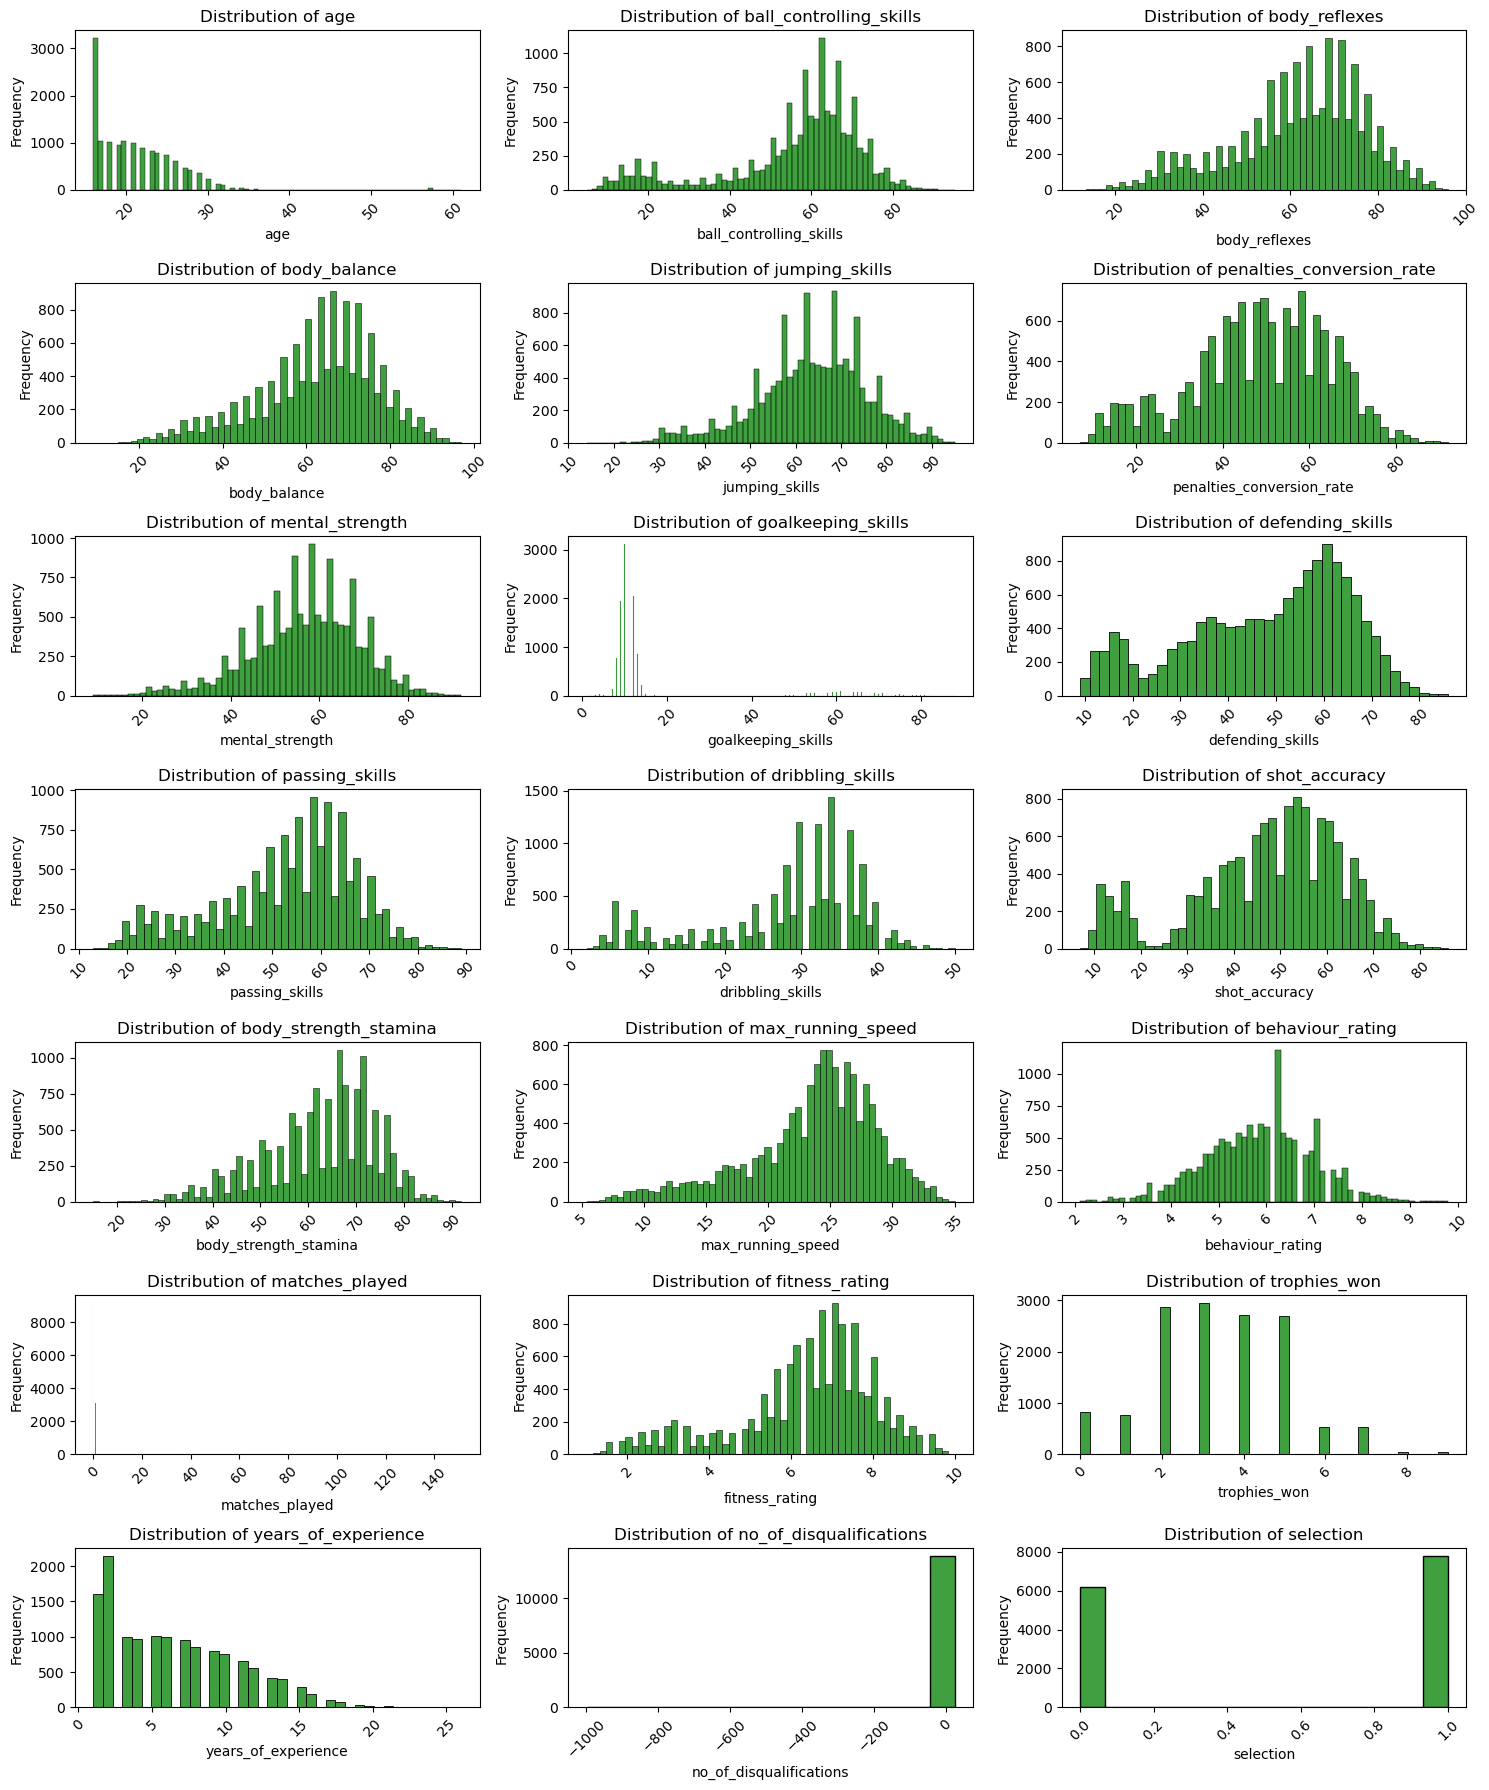

In [13]:
fig, axes = plt.subplots(7, 3, figsize=(15, 18))  # Adjust the figsize as needed

axes = axes.flatten()

for i, cols in enumerate(numerical):
    sns.histplot(data[cols], color='g', ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title('Distribution of {}'.format(cols))
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

for ax in axes[len(numerical):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#insights
# from these plots we can see most numerical plots have a normal distribution exept columns with discrete values like no_of_disqualification
# the target column selectioan, matches played, and trophies won

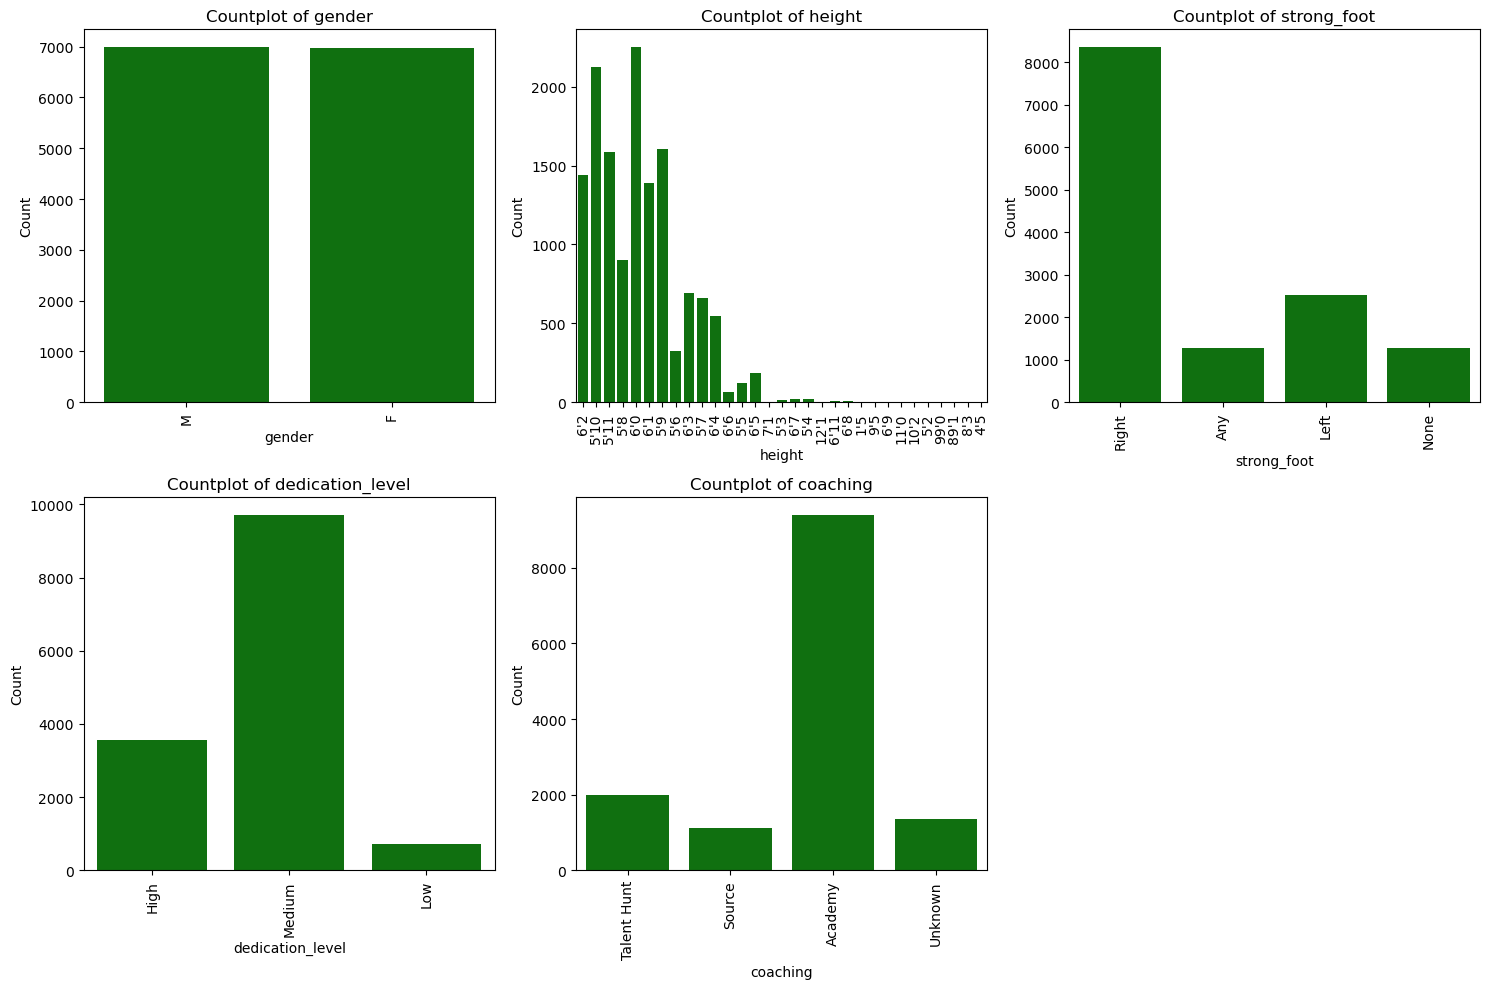

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns

axes = axes.flatten()

# List of categorical features you want to plot
categorical_features = ['gender', 'height', 'strong_foot', 'dedication_level', 'coaching']

for i, cols in enumerate(categorical_features):
    sns.countplot(x=data[cols], color='g', ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Count")
    axes[i].set_title('Countplot of {}'.format(cols))
    axes[i].tick_params(axis='x', labelrotation=90)

# Turn off remaining empty plots
for ax in axes[len(categorical_features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [115]:
#insights
# from these plots its evident that there are almost equal no of males and females in the dataset
# taller people are fewer
# there are more entries who have medium dedication level
# majority of the players are from the accademy

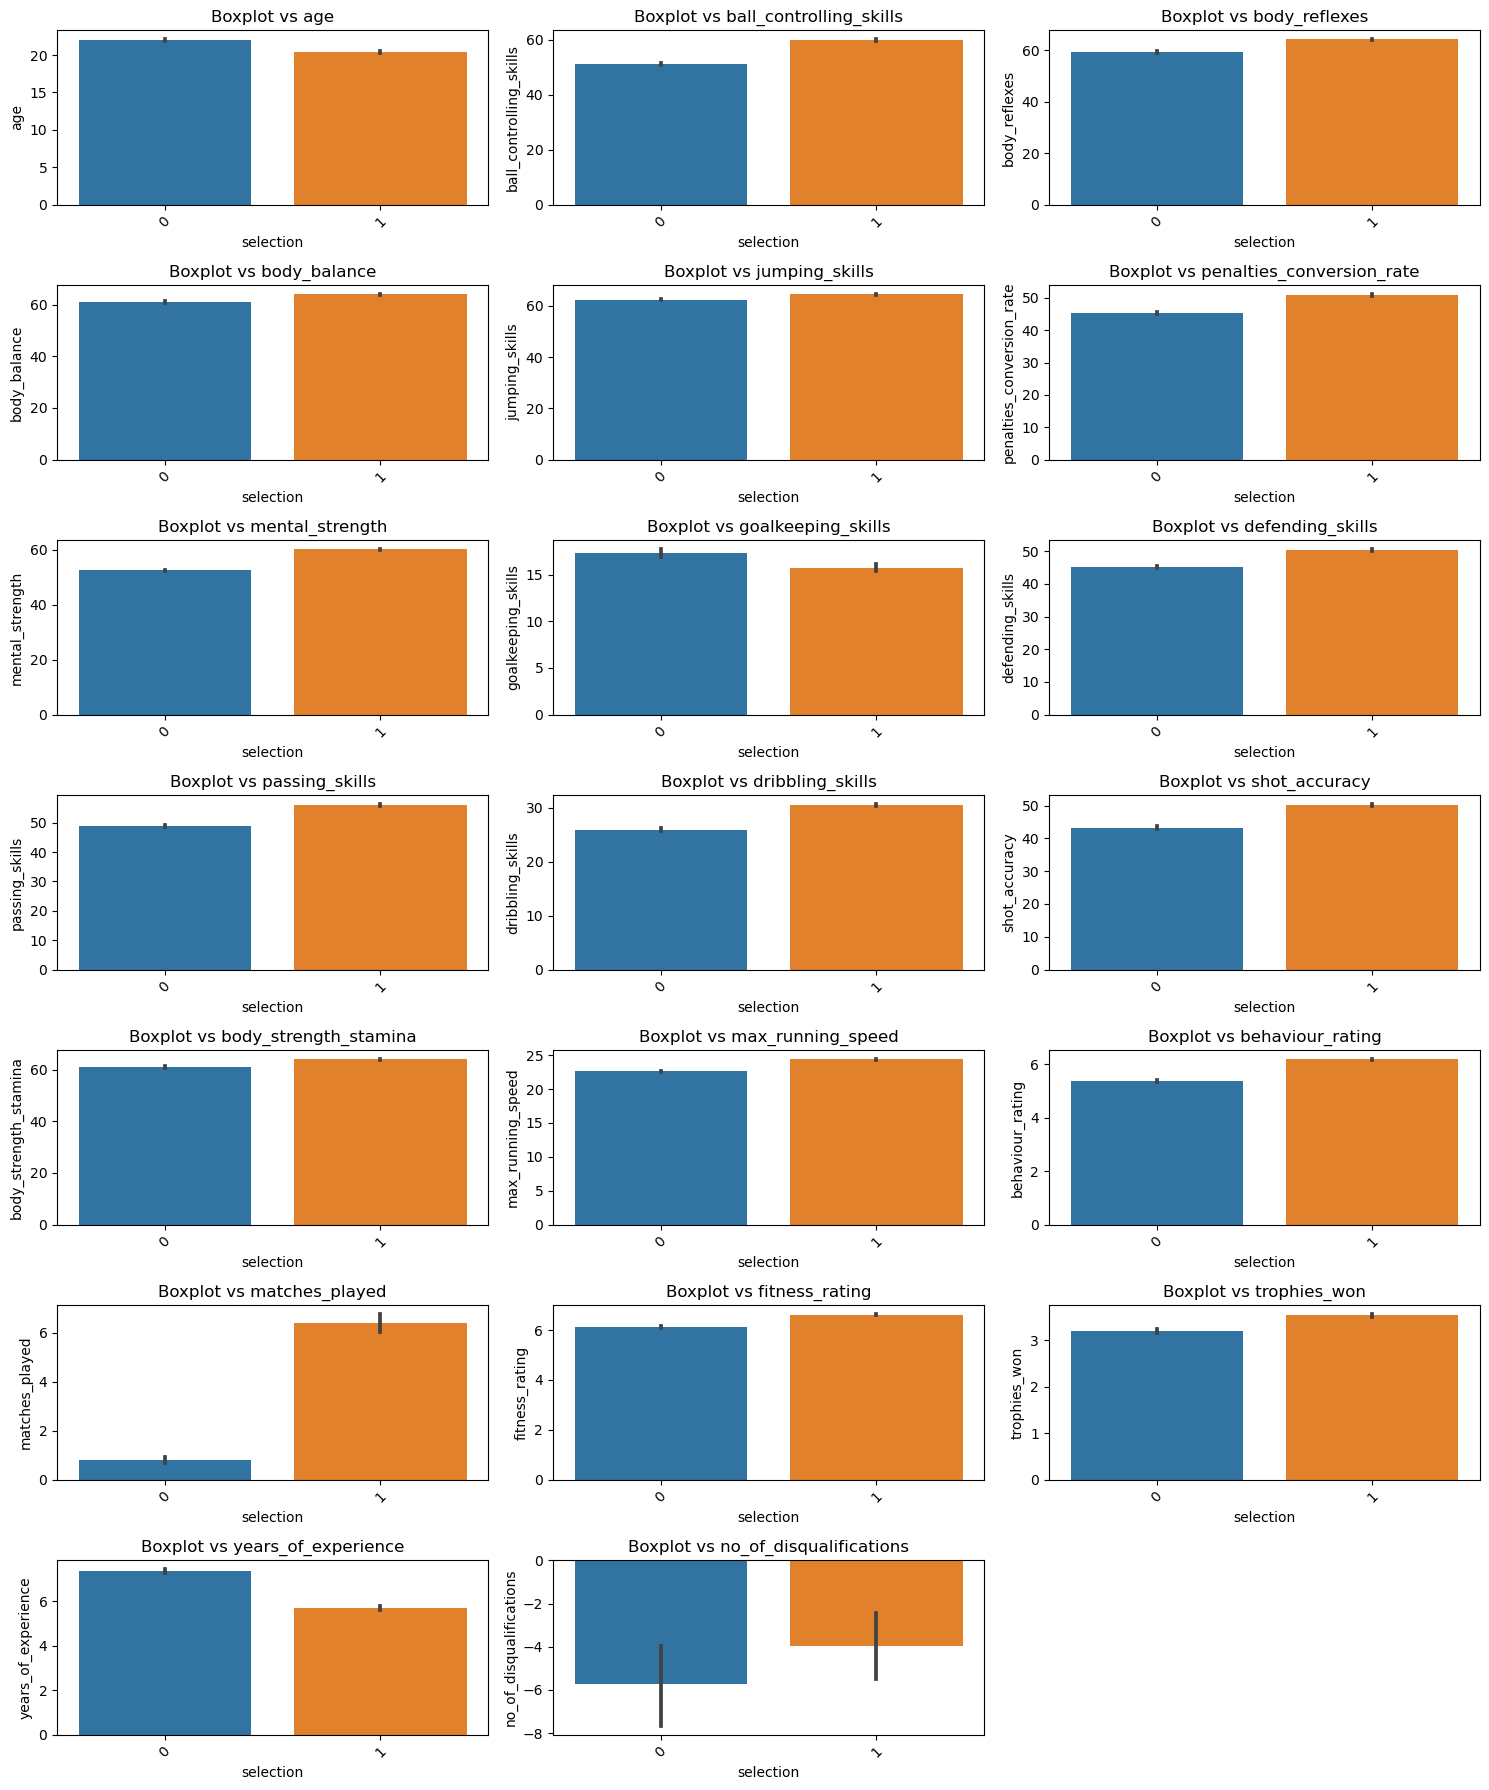

In [34]:
fig, axes = plt.subplots(7, 3, figsize=(15, 18))  # Adjust the figsize as needed

axes = axes.flatten()

for i, cols in enumerate(numerical):
    sns.barplot(y = data[cols],x = data['selection'], ax=axes[i])
    axes[i].set_xlabel('selection')
    axes[i].set_ylabel(cols)
    axes[i].set_title('Boxplot vs {}'.format(cols))
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

for ax in axes[len(numerical):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [116]:
# insights
# entries who have played more matched are more likely to be selected
# exepct for goalkeeping skills entries who have higher skills are more likely to be selected

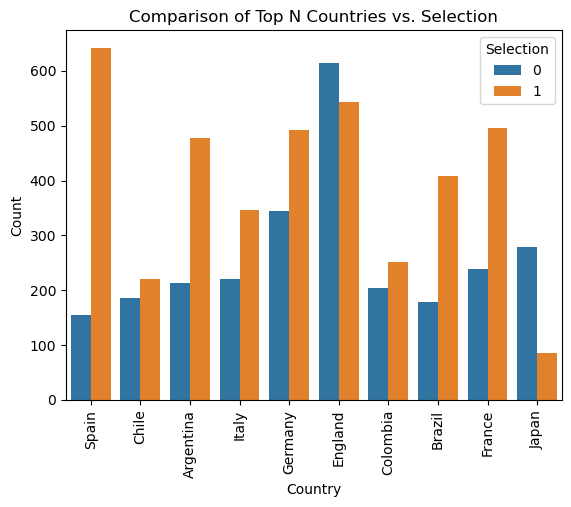

In [38]:
N = 10
top_countries = data['country'].value_counts().nlargest(N).index

# Filter the data to include only the top N countries
data_top_countries = data[data['country'].isin(top_countries)]

# Create a countplot for the top N countries
sns.countplot(data=data_top_countries, x='country', hue='selection')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Comparison of Top N Countries vs. Selection')
plt.xticks(rotation=90)
plt.legend(title='Selection')
plt.show()

In [ ]:
# this is a plot with the contries that occur more frequently in the dataset
# within these contries it is clear that spain has more selections while england have more rejection than selection but more no of entries are from england

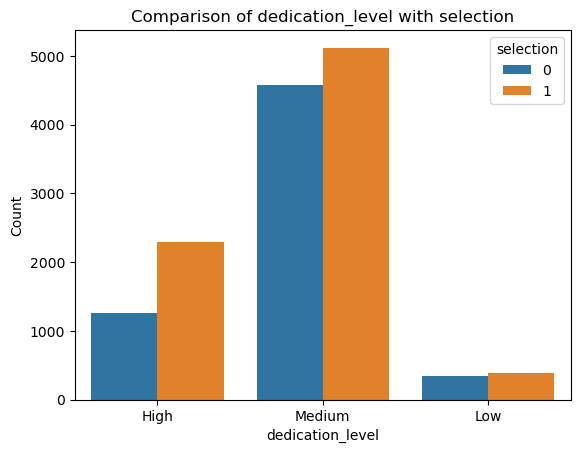

In [41]:
sns.countplot(data=data, x='dedication_level', hue='selection')

plt.xlabel('dedication_level')
plt.ylabel('Count')
plt.title('Comparison of dedication_level with selection')
plt.show()

In [ ]:
# entries with high and medium level of dedication are more likely to be selected

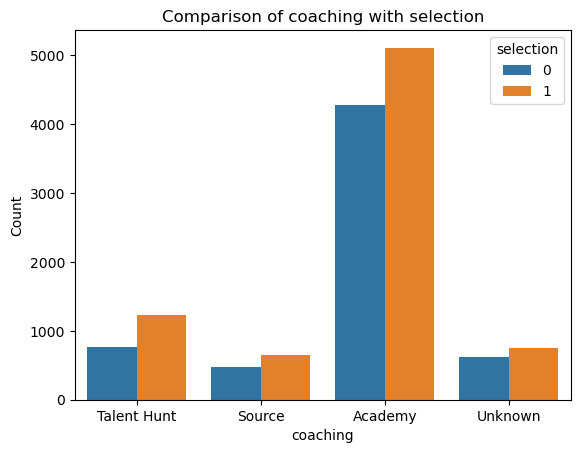

In [42]:
sns.countplot(data=data, x='coaching', hue='selection')

plt.xlabel('coaching')
plt.ylabel('Count')
plt.title('Comparison of coaching with selection')
plt.show()

## Preprocessing

### Filling missing values

In [54]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [46]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),4), ' % missing values')

gender 0.0014  % missing values
weight 0.0298  % missing values
ball_controlling_skills 0.0295  % missing values
jumping_skills 0.0017  % missing values
penalties_conversion_rate 0.0021  % missing values
mental_strength 0.002  % missing values
shot_accuracy 0.0409  % missing values
strong_foot 0.0394  % missing values
behaviour_rating 0.0502  % missing values
matches_played 0.0476  % missing values
fitness_rating 0.0497  % missing values
coaching 0.0089  % missing values
years_of_experience 0.0103  % missing values


In [62]:
data['gender'] = data['gender'].fillna(data['gender'].mode().iloc[0])

In [59]:
categorical

['gender',
 'country',
 'height',
 'weight',
 'strong_foot',
 'dedication_level',
 'coaching']

In [69]:
categorical_null = []

# Assuming data is your DataFrame and categorical is your list of categorical columns
for col in categorical:
    if data[col].isnull().any():
        categorical_null.append(col)


In [70]:
categorical_null

['weight', 'strong_foot', 'coaching']

In [71]:
for cols in categorical_null:
    data[cols] = data[cols].fillna(data[cols].mode().iloc[0])

In [73]:
for cols in numerical:
    data[cols] = data[cols].fillna(data[cols].median())

In [74]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

### Outliers checking

In [76]:
discrete_feature = [feature for feature in numerical if len(data[feature].unique())<=25]


In [77]:
discrete_feature

['matches_played',
 'trophies_won',
 'years_of_experience',
 'no_of_disqualifications']

In [80]:
numerical = [col for col in numerical if col not in discrete_feature]


In [81]:
numerical

['age',
 'ball_controlling_skills',
 'body_reflexes',
 'body_balance',
 'jumping_skills',
 'penalties_conversion_rate',
 'mental_strength',
 'goalkeeping_skills',
 'defending_skills',
 'passing_skills',
 'dribbling_skills',
 'shot_accuracy',
 'body_strength_stamina',
 'max_running_speed',
 'behaviour_rating',
 'fitness_rating']

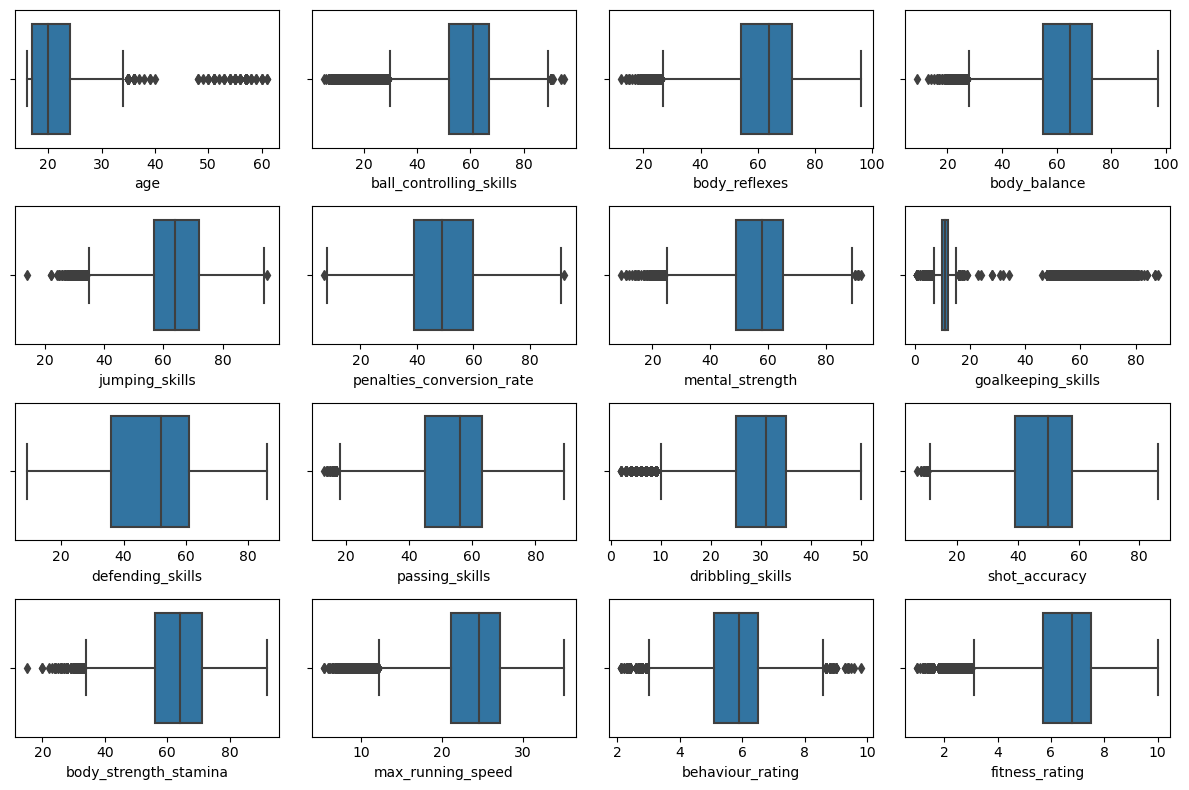

In [83]:
fid, axes = plt.subplots(4,4, figsize = (12,8))

axes = axes.flatten()

for i, cols in enumerate(numerical):
    sns.boxplot(x = data[cols], ax = axes[i])
    ax.set_title('Boxplot of {}'. format(cols))
    ax.set_xlabel(cols)
    
for ax in axes[len(numerical):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()

### Encoding

In [89]:
categorical_features = [features for features in data.columns if data[features].dtype == object]

In [92]:
categorical_features.remove('player_id')
categorical_features.remove('name')

In [91]:
from sklearn.preprocessing import LabelEncoder

In [93]:
for cols in categorical_features:
    le = LabelEncoder()
    data[cols] = le.fit_transform(data[cols])

### Feature reduction

In [96]:
data = data.drop(['player_id', 'name'], axis = 1)

## Model selection and Hyperparameter tuning

In [99]:
 #Split the data into features and target variable
x = data.drop("selection", axis=1)  
y = data["selection"]  

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.40)

In [102]:
x_test,x_val,y_test, y_val = train_test_split(x_test,y_test, random_state= 42, test_size= 0.50)

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Define your parameter grid for RandomizedSearchCV
param_dist ={'n_estimators': [10,50,100,200,500],
             'max_depth': [5,10,50,100, None],
             'criterion' : ["gini", "entropy"]}
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1
)

# Fit the RandomizedSearchCV object to your data
rf_random_search.fit(x_train, y_train)

# Define a function to print the results
def print_results_random(results):
    print('Best Params: {}\n'.format(results.best_params_))

    mean_scores = results.cv_results_['mean_test_score']
    std_scores = results.cv_results_['std_test_score']

    for mean_score, std_score, params in zip(mean_scores, std_scores, results.cv_results_['params']):
        print('{} +/- {} for {}'.format(round(mean_score, 3), round(std_score, 3), params))

# Print the results
print_results_random(rf_random_search)

Best Params: {'n_estimators': 200, 'max_depth': None, 'criterion': 'entropy'}

0.855 +/- 0.007 for {'n_estimators': 200, 'max_depth': 50, 'criterion': 'entropy'}
0.856 +/- 0.005 for {'n_estimators': 200, 'max_depth': None, 'criterion': 'entropy'}
0.855 +/- 0.006 for {'n_estimators': 500, 'max_depth': 100, 'criterion': 'entropy'}
0.85 +/- 0.005 for {'n_estimators': 50, 'max_depth': None, 'criterion': 'gini'}
0.854 +/- 0.007 for {'n_estimators': 500, 'max_depth': 100, 'criterion': 'gini'}
0.848 +/- 0.004 for {'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'}
0.814 +/- 0.007 for {'n_estimators': 200, 'max_depth': 5, 'criterion': 'gini'}
0.827 +/- 0.005 for {'n_estimators': 10, 'max_depth': 50, 'criterion': 'gini'}
0.803 +/- 0.008 for {'n_estimators': 10, 'max_depth': 5, 'criterion': 'gini'}
0.832 +/- 0.008 for {'n_estimators': 10, 'max_depth': 10, 'criterion': 'gini'}


In [106]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='entropy')
rf1.fit(x_train,y_train)

rf2 = RandomForestClassifier(n_estimators=200, max_depth=50, criterion='entropy')
rf2.fit(x_train,y_train)

rf3 = RandomForestClassifier(n_estimators=500, max_depth=100, criterion='gini')
rf3.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=500)

In [107]:
from sklearn.metrics import accuracy_score, precision_score

for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(x_val)
    accuracy = round(accuracy_score(y_val, y_pred), 2) 
    precision = round(precision_score(y_val, y_pred), 2)  
    print('Max Depth: {} # of Estimators: {} Criterion: {} -- Accuracy: {} / Precision: {}'.format(mdl.max_depth, mdl.n_estimators, mdl.criterion, accuracy, precision))

Max Depth: None # of Estimators: 200 Criterion: entropy -- Accuracy: 0.85 / Precision: 0.86
Max Depth: 50 # of Estimators: 200 Criterion: entropy -- Accuracy: 0.85 / Precision: 0.86
Max Depth: 100 # of Estimators: 500 Criterion: gini -- Accuracy: 0.85 / Precision: 0.85


In [108]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=50, criterion='entropy')
rf_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=200)

In [109]:
y_pred_rf=rf_final.predict(x_test)

In [111]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix

In [112]:
print('Accuracy=',accuracy_score(y_test,y_pred_rf))
print('Precision=',precision_score(y_test,y_pred_rf))
print('Recall=',recall_score(y_test,y_pred_rf))
print('F1 Score',f1_score(y_test,y_pred_rf))

Accuracy= 0.8513754912468738
Precision= 0.8608247422680413
Recall= 0.8697916666666666
F1 Score 0.8652849740932643


In [113]:
print(confusion_matrix(y_test,y_pred_rf))

[[1047  216]
 [ 200 1336]]
